In [90]:
from IPython.display import display, HTML
import statsmodels as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [91]:
data_salary = pd.read_csv('salary.csv')

In [92]:
data_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


1. How many responders are there? Are there any missing values in any of the variables.

In [93]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [94]:
print(f'The number of entries is {len(data_salary)}')

The number of entries is 514


In [95]:
data_salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

From the data_salary dataset, only the salary column has one missing value.

2. What is the lowest salary and the highest salary in the group?

In [96]:
minimum_salary = data_salary.salary.min()
maximum_salarry = data_salary.salary.max()
print(f'The lowest salary in the dataset is {minimum_salary} . The highest salary in the dataset is {maximum_salarry}')

The lowest salary in the dataset is 29000.0 . The highest salary in the dataset is 96156.0


In [97]:
data_salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


3. What is the mean salary for the sample? Include the standard error of the mean.

In [98]:
mean_salary = data_salary.salary.mean()
print(f'The mean of the salary column is {mean_salary}')

The mean of the salary column is 50863.22009783625


In [99]:
data_salary["salary"].fillna(mean_salary, inplace = True) 
(f'For the missing value in salary, the mean was used so that there are no missing values')

'For the missing value in salary, the mean was used so that there are no missing values'

In [100]:
from scipy.stats import sem
std_mean_err = sem(data_salary.salary)
print(f'The standard mean error of the salary column is {std_mean_err}')

The standard mean error of the salary column is 558.9715980665014


4. What is the standard deviation for the years worked?

In [101]:
std_dev = data_salary.yearsworked.std()
print(f'The standard deviation of the yearsworked column is {std_dev}')

The standard deviation of the yearsworked column is 9.444695144169803


5. What is the median salary for the sample?

In [102]:
median_salary = data_salary.loc[:,'salary'].median()
print(f'the median of the salary column is {median_salary}')

the median of the salary column is 50165.5


6. What is the interquartile range for salary in the sample?

In [103]:
Q1 = data_salary.salary.quantile(0.25)  
Q3 = data_salary.salary.quantile(0.75) 
 
IQR = Q3 - Q1 
print(f'The Interquantile range for the salary column is {IQR}')

The Interquantile range for the salary column is 20306.25


7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [110]:
males = len(data_salary[data_salary.male == 1])
print(f'The number of men in the male column are {men}')

The number of men in the male column are 386


In [111]:
females = len(data_salary[data_salary.male == 0])
print(f' The number of women in the male column is {women}')

 The number of women in the male column is 128


In [112]:
gender_table = data_salary.male.value_counts()
gender_table.index = ['Males','Females']
print(gender_table)

Males      386
Females    128
Name: male, dtype: int64


## 8. How many women are executives compared to men?

In [113]:
executives = len(data_salary[data_salary.position == 3])
print(executives)

211


In [114]:
executive_men = len(data_salary[(data_salary.male == 1)&(data_salary.position == 3)])
print(executive_men)

192


In [115]:
executive_women = len(data_salary[(data_salary.male == 0)&(data_salary.position == 3)])
print(executive_women)

19


## 9. Create a histogram for the variable Salary.

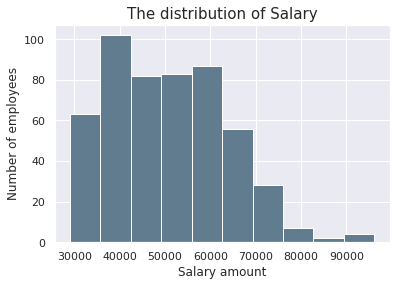

In [116]:
plt.hist(data_salary.salary, bins=10, color='#607c8e')

plt.xlabel('Salary amount')
plt.ylabel('Number of employees')
plt.title("The distribution of Salary", fontsize=15)
plt.show()


A majority of employees earn around R40 000. The graph also shows that after the R60 000 earnings bracket, fewer employees earn a higher salary.This could be because a small number of employees are in the managerial and executive level.

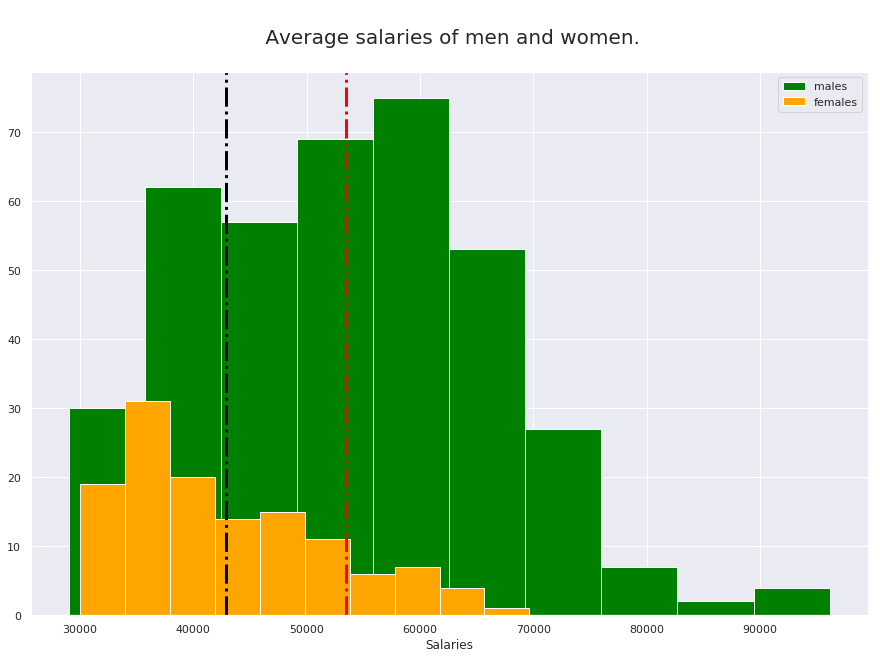

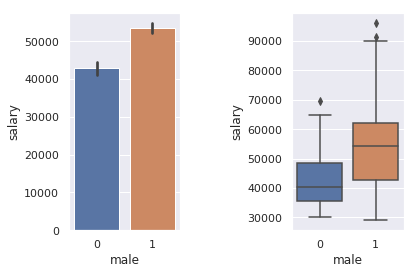

In [138]:
sns.set()
plt.figure(figsize=(15,10))
males = data_salary[data_salary.male == 1].salary
females = data_salary[data_salary.male == 0].salary

plt.hist(males, label='males', color="green")
plt.hist(females, label='females', color="orange")
plt.xlabel("Salaries")
plt.title('\n Average salaries of men and women.\n', fontsize = 20)

plt.axvline(males.mean(), color='red', linestyle='-.', linewidth=3)
plt.axvline(females.mean(), color='black', linestyle='-.', linewidth=3)
plt.legend()

fig, axes= plt.subplots(1, 2)
sns.barplot(x="male", y="salary", data=data_salary, ax= axes[0])
sns.boxplot(y='salary', x='male', data=data_salary, ax= axes[1])
plt.subplots_adjust(wspace=1)

plt.show()

In [ ]:
sns.set()
plt.figure(figsize=(15,10))
males = data_salary[data_salary.male == 1].salary
females = data_salary[data_salary.male == 0].salary

plt.hist(males, label='males', color="green")
plt.hist(females, label='females', color="orange")
plt.xlabel("Salaries")
plt.title('\n Average salaries of men and women.\n', fontsize = 20)

plt.axvline(males.mean(), color='red', linestyle='-.', linewidth=3)
plt.axvline(females.mean(), color='black', linestyle='-.', linewidth=3)
plt.legend()

fig, axes= plt.subplots(1, 2)
sns.barplot(x="male", y="salary", data=data_salary, ax= axes[0])
sns.boxplot(y='salary', x='male', data=data_salary, ax= axes[1])
plt.subplots_adjust(wspace=1)
plt.show()

## 12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line). 

In [ ]:
sns.regplot(x="yearsworked",y="salary", data=data_salary, color="red" )

plt.title("Relationship between Years Worked and Salary", fontsize=15)

There is a positive relationship between number of years worked and the salary earned by employees. There are a few outliers, this could be because there are other factors that influence the amount of salary earned by an employee.

In [88]:
years_salary = data_salary[['yearsworked', 'salary']]
years_salary.head()

,yearsworked,salary
0,0,53000.0
1,0,58000.0
2,0,45500.0
3,2,35782.0
4,2,34731.0


## 13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.

-    Interpret the size and direction of the correlation statistic.
-    Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.


In [89]:
years_val = data_salary["yearsworked"]
sal_val = data_salary["salary"]
print(f' The correlation coefficient and the p-value are as follows respectively : {stats.pearsonr(years_val, sal_val)}')

 The correlation coefficient and the p-value are as follows respectively : (0.6231354820920553, 1.2747795189687997e-56)


From the above, we can see the positive relationship shown in the graph is being confirmed by the value of the correlation coefficient. The p-vaue shows that the relationship between years worked and salary is statisticaly significant.